In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [6]:
dframe = pd.read_csv('C:\\Users\\Saiful_desv\\Desktop\\Python Learning\\lec25.txt',header=None)
dframe

,0,1,2,3,4
0,q,r,s,t,apple
1,2,3,4,5,pear
2,a,s,d,f,rabbit
3,5,2,5,7,dog


In [8]:
dframe.to_csv('C:\\Users\\Saiful_desv\\Desktop\\Python Learning\\Write.csv')

In [9]:
# JSON with Python

# Heres an example of what a JSON (JavaScript Object Notation) looks like:
json_obj = """
{   "zoo_animal": "Lion",
    "food": ["Meat", "Veggies", "Honey"],
    "fur": "Golden",
    "clothes": null, 
    "diet": [{"zoo_animal": "Gazelle", "food":"grass", "fur": "Brown"}]
}
"""

In [10]:
import json

In [14]:
data = json.loads(json_obj)
data

{'zoo_animal': 'Lion',
 'food': ['Meat', 'Veggies', 'Honey'],
 'fur': 'Golden',
 'clothes': None,
 'diet': [{'zoo_animal': 'Gazelle', 'food': 'grass', 'fur': 'Brown'}]}

In [17]:
dframe = DataFrame(data['diet'])
dframe

,food,fur,zoo_animal
0,grass,Brown,Gazelle


In [19]:
# HTML with Python

from pandas import read_html

In [20]:
#Lets grab a url for list of failed banks
url = 'http://www.fdic.gov/bank/individual/failed/banklist.html'

In [ ]:
"""
IMPORTANT NOTE: NEED TO HAVE beautiful-soup INSTALLED as well as html5lib !!!!

"""

In [32]:
dframe_l = pd.io.html.read_html(url)

In [33]:
dframe = dframe_l[0]

# Head of data
dframe.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017","February 21, 2018"
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,"October 13, 2017","February 21, 2018"
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017","July 26, 2017"
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017","March 22, 2018"
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,"April 28, 2017","December 5, 2017"


In [30]:
# Column names
dframe.columns.values

array(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date', 'Updated Date'], dtype=object)

In [37]:
# MS Excel files in Python

xlsfile = pd.ExcelFile("C:\\Users\\Saiful_desv\\Desktop\\Python Learning\\Lec_28_test.xlsx")
xlsfile

In [41]:
dframe = xlsfile.parse('Sheet1')
dframe

,This is a test,Unnamed: 1,Unnamed: 2
0,23,6678,456
1,234,678,456
2,234,7,345
3,34,56,234
4,5,456,4365


In [46]:
#################
#### Merge ######
#################


df1 = DataFrame({'key':['X','Z','X','Y','Y','X'],'data_set1':np.arange(6)})
df1

,key,data_set1
0,X,0
1,Z,1
2,X,2
3,Y,3
4,Y,4
5,X,5


In [47]:
df2 = DataFrame({'key':['Q','Y','Z'], 'data_set2':np.arange(3)})
df2

,key,data_set2
0,Q,0
1,Y,1
2,Z,2


In [54]:
pd.merge(df1,df2)

,key,data_set1,data_set2
0,Z,1,2
1,Y,3,1
2,Y,4,1


In [55]:
pd.merge(df1,df2,on='key',how='left')

,key,data_set1,data_set2
0,X,0,NaN
1,Z,1,2.0
2,X,2,NaN
3,Y,3,1.0
4,Y,4,1.0
5,X,5,NaN


In [56]:
pd.merge(df1,df2,on='key',how='right')

,key,data_set1,data_set2
0,Z,1.0,2
1,Y,3.0,1
2,Y,4.0,1
3,Q,NaN,0


In [57]:
pd.merge(df1,df2,on='key',how='inner')

,key,data_set1,data_set2
0,Z,1,2
1,Y,3,1
2,Y,4,1


In [61]:
pd.merge(df1,df2,on='key',how='outer')

,key,data_set1,data_set2
0,X,0.0,NaN
1,X,2.0,NaN
2,X,5.0,NaN
3,Z,1.0,2.0
4,Y,3.0,1.0
5,Y,4.0,1.0
6,Q,NaN,0.0


In [66]:
#Now we'll learn about a many to many merge

# Nnote that these DataFrames contain more than one instance of the key in BOTH datasets

df3 = DataFrame({'key': ['X', 'X', 'X', 'Y', 'Z', 'Z'],
                 'data_set_3': range(6)})
df4 = DataFrame({'key': ['Y', 'Y', 'X', 'X', 'Z'],
                 'data_set_4': range(5)})
#Show the merge
pd.merge(df3, df4)

,key,data_set_3,data_set_4
0,X,0,2
1,X,0,3
2,X,1,2
3,X,1,3
4,X,2,2
5,X,2,3
6,Y,3,0
7,Y,3,1
8,Z,4,4
9,Z,5,4


In [67]:
df3

,key,data_set_3
0,X,0
1,X,1
2,X,2
3,Y,3
4,Z,4
5,Z,5


In [68]:
df4

,key,data_set_4
0,Y,0
1,Y,1
2,X,2
3,X,3
4,Z,4


In [70]:
# We can also merge with multiple keys!

# Dframe on left
df_left = DataFrame({'key1': ['SF', 'SF', 'LA'],
                  'key2': ['one', 'two', 'one'],
                  'left_data': [10,20,30]})

#Dframe on right
df_right = DataFrame({'key1': ['SF', 'SF', 'LA', 'LA'],
                   'key2': ['one', 'one', 'one', 'two'],
                   'right_data': [40,50,60,70]})

df_left

,key1,key2,left_data
0,SF,one,10
1,SF,two,20
2,LA,one,30


In [71]:
df_right

,key1,key2,right_data
0,SF,one,40
1,SF,one,50
2,LA,one,60
3,LA,two,70


In [72]:
#Merge
pd.merge(df_left, df_right, on=['key1', 'key2'], how='outer')

,key1,key2,left_data,right_data
0,SF,one,10.0,40.0
1,SF,one,10.0,50.0
2,SF,two,20.0,NaN
3,LA,one,30.0,60.0
4,LA,two,NaN,70.0


In [74]:
#Note that the left and right DataFrames have overlapping key names (key1 and key2).
# pandas automatically adds suffixes to them

pd.merge(df_left,df_right,on='key1')

,key1,key2_x,left_data,key2_y,right_data
0,SF,one,10,one,40
1,SF,one,10,one,50
2,SF,two,20,one,40
3,SF,two,20,one,50
4,LA,one,30,one,60
5,LA,one,30,two,70


In [77]:
# We can also specify what the suffix becomes
pd.merge(df_left,df_right, on='key1',suffixes=('_lefty','_righty'))

,key1,key2_lefty,left_data,key2_righty,right_data
0,SF,one,10,one,40
1,SF,one,10,one,50
2,SF,two,20,one,40
3,SF,two,20,one,50
4,LA,one,30,one,60
5,LA,one,30,two,70


In [84]:
# For more info on merge parameters check out:
url = 'http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.merge.html'

# Next we'll learn how to merge on Index!

In [86]:
# Lets get two dframes

df_left = DataFrame({'key': ['X','Y','Z','X','Y'],
                  'data': range(5)})
df_right = DataFrame({'group_data': [10, 20]}, index=['X', 'Y'])

In [87]:
df_left

,key,data
0,X,0
1,Y,1
2,Z,2
3,X,3
4,Y,4


In [88]:
df_right

,group_data
X,10
Y,20


In [89]:
#Now merge, we'll use the key for the left Dframe, and the index for the right
pd.merge(df_left,df_right,left_on='key',right_index=True)

,key,data,group_data
0,X,0,10
3,X,3,10
1,Y,1,20
4,Y,4,20


In [90]:
# We can also get a union by using outer
pd.merge(df_left,df_right,left_on='key',right_index=True,how='outer')

,key,data,group_data
0,X,0,10.0
3,X,3,10.0
1,Y,1,20.0
4,Y,4,20.0
2,Z,2,NaN


In [91]:
#Now let's try something a little more complicated, remember hierarchal index?
df_left_hr = DataFrame({'key1': ['SF','SF','SF','LA','LA'],
                   'key2': [10, 20, 30, 20, 30],
                   'data_set': np.arange(5.)})

df_right_hr = DataFrame(np.arange(10).reshape((5, 2)),
                   index=[['LA','LA','SF','SF','SF'],
                          [20, 10, 10, 10, 20]],
                   columns=['col_1', 'col_2'])

In [92]:
df_left_hr

,key1,key2,data_set
0,SF,10,0.0
1,SF,20,1.0
2,SF,30,2.0
3,LA,20,3.0
4,LA,30,4.0


In [93]:
df_right_hr

col_1  col_2
LA 20      0      1
   10      2      3
SF 10      4      5
   10      6      7
   20      8      9

In [94]:

# Now we can merge the left by using keys and the right by its index
pd.merge(df_left_hr,df_right_hr,left_on=['key1','key2'],right_index=True)

,key1,key2,data_set,col_1,col_2
0,SF,10,0.0,4,5
0,SF,10,0.0,6,7
1,SF,20,1.0,8,9
3,LA,20,3.0,0,1


In [95]:
# We can alo keep a union by choosing 'outer' method
pd.merge(df_left_hr,df_right_hr,left_on=['key1','key2'],right_index=True,how='outer')

,key1,key2,data_set,col_1,col_2
0,SF,10,0.0,4.0,5.0
0,SF,10,0.0,6.0,7.0
1,SF,20,1.0,8.0,9.0
2,SF,30,2.0,NaN,NaN
3,LA,20,3.0,0.0,1.0
4,LA,30,4.0,NaN,NaN
4,LA,10,NaN,2.0,3.0


In [96]:
# WE can also you .join()

# Shown on our first two DataFrames
df_left.join(df_right)

,key,data,group_data
0,X,0,NaN
1,Y,1,NaN
2,Z,2,NaN
3,X,3,NaN
4,Y,4,NaN


In [99]:
##################
## Concatenate ###
##################



# First in just Numpy

# Create a matrix 
arr1 = np.arange(9).reshape((3,3))
arr1

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [100]:
# Concatenate along axis 1
np.concatenate([arr1,arr1],axis=1)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]])

In [101]:
np.concatenate([arr1,arr1],axis=0)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [103]:
# Now let's see how this works in pandas


# Lets create two Series with no overlap
ser1 =  Series([0,1,2],index=['T','U','V'])

ser2 = Series([3,4],index=['X','Y'])

#Now let use concat (default is axis=0)
pd.concat([ser1,ser2])

T    0
U    1
V    2
X    3
Y    4
dtype: int64

In [106]:
# Now passing along another axis will produce a DataFrame
pd.concat([ser1,ser2],axis=1,sort=True)

,0,1
T,0.0,NaN
U,1.0,NaN
V,2.0,NaN
X,NaN,3.0
Y,NaN,4.0


In [107]:
# We can specify which specific axes to be used
pd.concat([ser1,ser2],axis=1,join_axes=[['U','V','Y']])

,0,1
U,1.0,NaN
V,2.0,NaN
Y,NaN,4.0


In [108]:
# Lets say we wanted to add markers.keys to the concatenation result

# WE can do this with a hierarchical index
pd.concat([ser1,ser2],keys=['cat1','cat2'])

cat1  T    0
      U    1
      V    2
cat2  X    3
      Y    4
dtype: int64

In [110]:
# Along the axis=1 then these Keys become column headers
pd.concat([ser1,ser2],axis=1,keys=['cat1','cat2'],sort=True)

,cat1,cat2
T,0.0,NaN
U,1.0,NaN
V,2.0,NaN
X,NaN,3.0
Y,NaN,4.0


In [111]:
#Lastly, everything works similarly in DataFrames

dframe1 = DataFrame(np.random.randn(4,3), columns=['X', 'Y', 'Z'])
dframe2 = DataFrame(np.random.randn(3, 3), columns=['Y', 'Q', 'X'])

In [113]:
#Concat on DataFrame
pd.concat([dframe1,dframe2],sort=True)

,Q,X,Y,Z
0,NaN,-0.747044,-1.010379,-0.058524
1,NaN,-0.460844,1.134053,-0.419646
2,NaN,0.130604,-0.956958,-0.912168
3,NaN,1.352035,-0.640698,0.591769
0,1.430631,1.106358,-0.368262,NaN
1,0.368078,-0.131297,0.580777,NaN
2,0.360144,-1.888712,-0.786961,NaN


In [115]:
#If we dont care about the index info and just awnt to make a complete DataFrame, just use ignore_index
pd.concat([dframe1,dframe2],ignore_index=True,sort=True)

,Q,X,Y,Z
0,NaN,-0.747044,-1.010379,-0.058524
1,NaN,-0.460844,1.134053,-0.419646
2,NaN,0.130604,-0.956958,-0.912168
3,NaN,1.352035,-0.640698,0.591769
4,1.430631,1.106358,-0.368262,NaN
5,0.368078,-0.131297,0.580777,NaN
6,0.360144,-1.888712,-0.786961,NaN


In [4]:
# Combining DataFrame


#Let's make a dframe
dframe = DataFrame({'k1':['X','X','Y','Y','Z'],
                    'k2':['alpha','beta','alpha','beta','alpha'],
                    'dataset1':np.random.randn(5),
                    'dataset2':np.random.randn(5)})

#Show
dframe

,k1,k2,dataset1,dataset2
0,X,alpha,0.674374,1.830102
1,X,beta,0.849780,-1.038801
2,Y,alpha,0.955770,0.780046
3,Y,beta,-0.195898,0.027926
4,Z,alpha,-1.021510,1.130113


In [7]:
#Now let's see how to use groupby

#Lets grab the dataset1 column and group it by the k1 key
group1 = dframe['dataset1'].groupby(dframe['k1'])

#Show the groupby object
group1

In [8]:

#Now we can perform operations on this particular group
group1.mean()

k1
X    0.762077
Y    0.379936
Z   -1.021510
Name: dataset1, dtype: float64

In [10]:
# We can use group keys that are series as well

#For example:

#We'll make some arrays for use as keys
cities = np.array(['NY','LA','LA','NY','NY'])
month = np.array(['JAN','FEB','JAN','FEB','JAN'])

#Now using the data from dataset1, group the means by city and month
dframe['dataset1'].groupby([cities,month]).mean()

LA  FEB    0.849780
    JAN    0.955770
NY  FEB   -0.195898
    JAN   -0.173568
Name: dataset1, dtype: float64

In [11]:
# WE can also pass column names as group keys
dframe.groupby('k1').mean()

,dataset1,dataset2
k1,,
X,0.762077,0.395650
Y,0.379936,0.403986
Z,-1.021510,1.130113


In [12]:

# Or multiple column names
dframe.groupby(['k1','k2']).mean()

dataset1  dataset2
k1 k2                       
X  alpha  0.674374  1.830102
   beta   0.849780 -1.038801
Y  alpha  0.955770  0.780046
   beta  -0.195898  0.027926
Z  alpha -1.021510  1.130113

In [13]:
# Another useful groupby method is getting the group sizes
dframe.groupby(['k1']).size()

k1
X    2
Y    2
Z    1
dtype: int64

In [16]:
# We can also iterate over groups

#For example:
for name,group in dframe.groupby('k1'):
    print ("This is the %s group" %name)
    print (group)
    print ('\n')

This is the X group
  k1     k2  dataset1  dataset2
0  X  alpha  0.674374  1.830102
1  X   beta  0.849780 -1.038801


This is the Y group
  k1     k2  dataset1  dataset2
2  Y  alpha  0.955770  0.780046
3  Y   beta -0.195898  0.027926


This is the Z group
  k1     k2  dataset1  dataset2
4  Z  alpha  -1.02151  1.130113




In [2]:
# Data Agrregation consists of operations that result in a scalar (e.g. mean(),sum(),count(), etc)

#Let's get a csv data set to play with
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'


# Save thewinquality.csv file in the same folder as your ipython notebooks, note the delimiter used ;
dframe_wine = pd.read_csv('C:\\Users\\Saiful_desv\\Desktop\\Python Learning\\winequality_red.csv',sep=';')

In [31]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
# How about we find out the average alcohol content for the wine
dframe_wine['alcohol'].mean()

10.422983114446502

In [33]:
dframe_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [34]:
# That was an example of an aggregate, how about we make our own?
def max_to_min(arr):
    return arr.max() - arr.min()

# Let's group the wines by "quality"
wino = dframe_wine.groupby('quality')

# Show
wino.describe()

alcohol                                                          \
          count       mean       std  min     25%     50%     75%   max   
quality                                                                   
3          10.0   9.955000  0.818009  8.4   9.725   9.925  10.575  11.0   
4          53.0  10.265094  0.934776  9.0   9.600  10.000  11.000  13.1   
5         681.0   9.899706  0.736521  8.5   9.400   9.700  10.200  14.9   
6         638.0  10.629519  1.049639  8.4   9.800  10.500  11.300  14.0   
7         199.0  11.465913  0.961933  9.2  10.800  11.500  12.100  14.0   
8          18.0  12.094444  1.224011  9.8  11.325  12.150  12.875  14.0   

        chlorides            ...   total sulfur dioxide         \
            count      mean  ...                    75%    max   
quality                      ...                                 
3            10.0  0.122500  ...                   42.5   49.0   
4            53.0  0.090679  ...                   49.0  119.0   
5           681.0  0.092736  ...                   84.0  155.0   
6           638.0  0.084956  ...                   54.0  165.0   
7           199.0  0.076588  ...                   43.0  289.0   
8            18.0  0.068444  ...                   43.0   88.0   

        volatile acidity                                                   \
                   count      mean       std   min     25%    50%     75%   
quality                                                                     
3                   10.0  0.884500  0.331256  0.44  0.6475  0.845  1.0100   
4                   53.0  0.693962  0.220110  0.23  0.5300  0.670  0.8700   
5                  681.0  0.577041  0.164801  0.18  0.4600  0.580  0.6700   
6                  638.0  0.497484  0.160962  0.16  0.3800  0.490  0.6000   
7                  199.0  0.403920  0.145224  0.12  0.3000  0.370  0.4850   
8                   18.0  0.423333  0.144914  0.26  0.3350  0.370  0.4725   

                
           max  
quality         
3        1.580  
4        1.130  
5        1.330  
6        1.040  
7        0.915  
8        0.850  

[6 rows x 88 columns]

In [35]:
# We can now apply our own aggregate function, this function takes the max value of the col and subtracts the min value of the col
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [36]:
# We can also pass string methods through aggregate
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [37]:
dframe_wine.groupby('quality').agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [38]:
# Let's go back to the original dframe
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [39]:
# Let's adda  quality to alcohol content ratio
dframe_wine['qual/alc ratio'] = dframe_wine['quality']/dframe_wine['alcohol']

In [40]:
# WE can also use pivot tables instead of groupby

# Pivot table of quality
dframe_wine.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


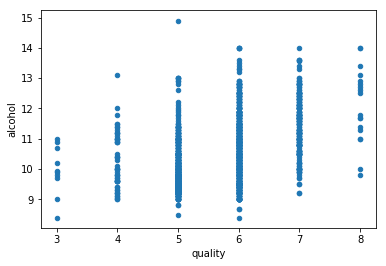

In [42]:
%matplotlib inline
dframe_wine.plot(kind='scatter',x='quality',y='alcohol')